In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# Step 2 - Reading the Data and Performing Basic DataChecks

df = pd.read_csv('regressionexample.csv')
print(df.shape)
df.describe()

(574, 5)


,pce,pop,psavert,uempmed,unemploy
count,574.000000,574.000000,574.000000,574.000000,574.000000
mean,4843.510453,257189.381533,7.936585,8.610105,7771.557491
std,3579.287206,36730.801593,3.124394,4.108112,2641.960571
min,507.400000,198712.000000,1.900000,4.000000,2685.000000
25%,1582.225000,224896.000000,5.500000,6.000000,6284.000000
50%,3953.550000,253060.000000,7.700000,7.500000,7494.000000
75%,7667.325000,290290.750000,10.500000,9.100000,8691.000000
max,12161.500000,320887.000000,17.000000,25.200000,15352.000000


In [3]:
target_column = ['unemploy']
predictors = list(set(list(df.columns))-
set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,pce,pop,psavert,uempmed,unemploy
count,574.000000,574.000000,574.000000,574.000000,574.000000
mean,0.398266,0.801495,0.466858,0.341671,7771.557491
std,0.294313,0.114466,0.183788,0.163020,2641.960571
min,0.041722,0.619258,0.111765,0.158730,2685.000000
25%,0.130101,0.700857,0.323529,0.238095,6284.000000
50%,0.325087,0.788627,0.452941,0.297619,7494.000000
75%,0.630459,0.904651,0.617647,0.361111,8691.000000
max,1.000000,1.000000,1.000000,1.000000,15352.000000


In [4]:
#Step 4 - Creating the Training and Test Datasets

X = df[predictors]
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(401, 4)
(173, 4)


In [5]:
X_train.head()

,uempmed,psavert,pce,pop
256,0.226190,0.452941,0.283435,0.766264
28,0.190476,0.676471,0.051096,0.634180
511,0.789683,0.305882,0.825120,0.963040
295,0.325397,0.541176,0.338511,0.796068
411,0.289683,0.158824,0.596160,0.891585


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f"model score on training data:{model.score(X_train, y_train)}")
print(f"model score on testing data:{model.score(X_test, y_test)}")

model score on training data:0.8685609551239368
model score on testing data:0.8396633322870097


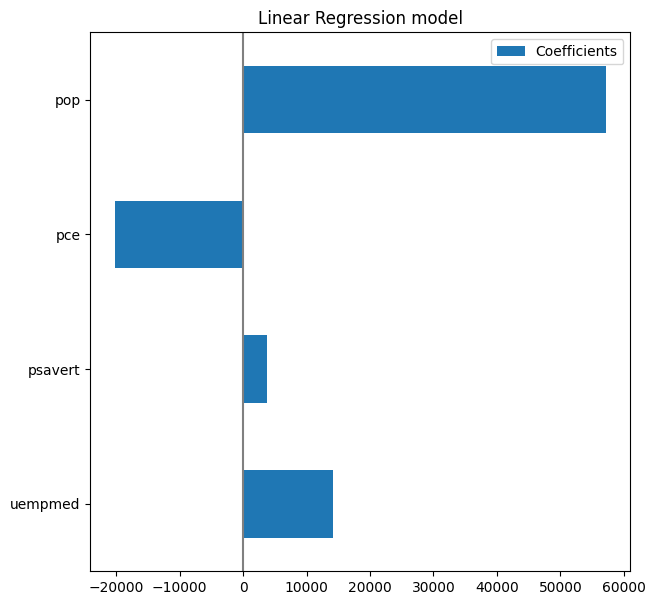

In [7]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(model.coef_.reshape(4,1), columns=["Coefficients"], index = X_train.columns)
coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Linear Regression model")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)